# `--- Day 21: Fractal Art ---`

In [1]:
from collections import Counter
from functools import reduce
from operator import concat

In [2]:
input_lines = open('input.txt').readlines()
test_lines = '''../.# => ##./#../...
.#./..#/### => #..#/..../..../#..#'''.splitlines()

## convert strings <-> grids

In [3]:
def string2grid(s):
    g = []
    for l in s.split('/'):
        g.append(list(l))
    return g

def grid2string(g):
    s = []
    for l in g:
        s.append(''.join(l))
    return '/'.join(s)

## split/combine grids, apply enhancement...

In [4]:
def splitsize(g):
    if len(g) % 2 == 0:
        return 2
    else:
        return 3

def lsplit(l, chunksize):
    assert(len(l) % chunksize == 0)
    inlist = l[:] # copy
    outlist = []
    while inlist:
        chunk = inlist[:chunksize]
        inlist = inlist[chunksize:]
        outlist.append(chunk)
    return outlist
        
def split(g):
    size = splitsize(g)
    splitter = lambda x: lsplit(x, size)
    out_grid = [] # will be NxN list of grids (each a MxM list of chars)
    in_grid = g[:] # shallow copy
    while in_grid:
        rows = in_grid[:size]
        in_grid = in_grid[size:]
        splitrows = list(map(splitter, rows))
        out_grid.append(list(map(list, zip(*splitrows))))
    return out_grid

def combine(g):
    out_list = []
    for row in g:
        out_list.append(list(map(lambda x: reduce(concat,x), list(zip(*row)))))
    return list(reduce(concat, out_list))

def enhance(grid, rules):
    enhanced = []
    for row in split(grid): # split
        erow = []
        for g in row:
            key = grid2string(g)
            erow.append(string2grid(rules[key])) # apply
        enhanced.append(erow)
    return combine(enhanced) # combine

## grid transformations

In [5]:
def compose(f,g):
    def new(x):
        return f(g(x))
    return new

def vflip(g):
    return list(reversed(g))

def hflip(g):
    return list(map(lambda x: list(reversed(x)), g))

def transpose(g):
    return list(map(list, zip(*g)))

def e(g):
    # identity element
    return g

r90 = compose(transpose, vflip)
r180 = compose(hflip, vflip)
r270 = compose(transpose, hflip)
neswflip = compose(vflip, r90)
nwseflip = compose(hflip, r90)

all_transforms = [e, r90, r180, r270, hflip, vflip, neswflip, nwseflip] # symmetry group of square

def fapply(flist, arg):
    '''apply a list of functions to an argument, returning the list of results
    fapply([f, g, h], x) => [f(x), g(x), h(x)]'''
    return list(map(lambda x: x(arg), flist))

## pretty printing grids

In [6]:
def as_str(g):
    return '\n'.join(map(lambda x: ''.join(x), g))

def pretty(g):
    print(as_str(g))

In [7]:
def pixelcount(g):
    c = Counter(grid2string(g))
    return c['#']

## make enhancement dictionary

In [8]:
def rules2dict(rules):
    rulesdict = {}
    for rule in rules:
        rule = rule.strip()
        pattern, _, target = rule.partition(' => ')
        for pat in map(grid2string, fapply(all_transforms, string2grid(pattern))):
            rulesdict[pat] = target
    return rulesdict

### Testing

In [9]:
rules = rules2dict(test_lines)

In [10]:
start = string2grid('.#./..#/###')
pretty(start)

.#.
..#
###


In [11]:
iter1 = enhance(start, rules)
pretty(iter1)

#..#
....
....
#..#


In [12]:
iter2 = enhance(iter1, rules)
pretty(iter2)

##.##.
#..#..
......
##.##.
#..#..
......


In [13]:
print(f'testing part 1: {pixelcount(iter2)}')

testing part 1: 12


# Part 1

In [14]:
rules = rules2dict(input_lines)

In [15]:
%%timeit -n 1 -r 1
g = start
for i in range(5):
    g = enhance(g, rules)
print(f'part 1 answer: {pixelcount(g)}')

part 1 answer: 194
546 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Part 2

In [16]:
%%timeit -n 1 -r 1
g = start
for i in range(18):
    g = enhance(g, rules)
print(f'part 2 answer: {pixelcount(g)}')

part 2 answer: 2536879
14.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [17]:
g = start
for i in range(18):
    g = enhance(g, rules)
print(f'part 2 answer: {pixelcount(g)}')

part 2 answer: 2536879


# eye-candy

In [19]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.DataFrame(g)

In [24]:
df = df.replace(['.', '#'], [0,1])

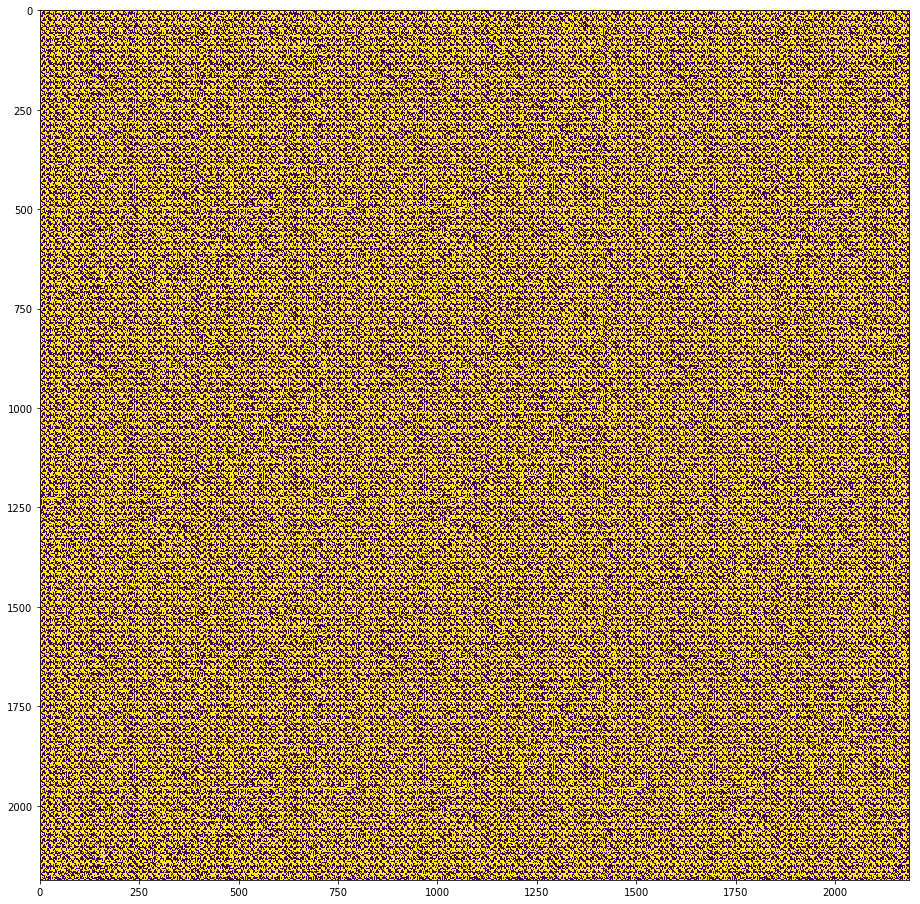

In [29]:
fig, ax = plt.subplots(figsize=(16,16))
plt.imshow(df)
plt.savefig('part2.png')